
#### 1) Gaza-Israel Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

In [22]:
df = pd.read_csv("gaza_israel/Manual_data_collection/Gaza_Israel_Dataset_Text_Images_Manual_Data_Collection_AFP_Reuters_Snopes_Politifact_200425.csv")
print(len(df)) #60 claims in total
df.head()

60


,Website,Article_URL,Headline,Month/Year,Query/Keyword,Label_Website,True_Image_URL,False_Caption/Original_Claim,True_Caption/Context,Text_Only_Claim?,Normal_Image?,AI_Generated_Image?,Altered_Image?,False_Image_URL,Possible_Query_Google Image Search
0,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.37W26WD,Image of 'Gazan mother with son's bones' is ma...,03/25,Israeli-Palestinian conflict,FALSE,https://scontent-ham3-1.xx.fbcdn.net/v/t39.308...,"""A mother holds the bones of her son in Gaza. ...",But an image circulating worldwide on social m...,No,No,Yes,No,NaN,Palestinian mother son AI image
1,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.36XY2FV,Old image misrepresented as 'Israeli settlers'...,02/25,Israeli-Palestinian conflict,FALSE,https://pbs.twimg.com/media/Gj5tbXiaQAAoG1z?fo...,"""Israeli media reports there are Jews who have...",A https://youtu.be/linGPlWGcDw?si=ir8GlgXmFpx9...,No,Yes,No,No,NaN,NaN
2,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.36RF6BZ,"Picture shows Israel's 2018 Gaza attack, not a...",12/24,Israeli-Palestinian conflict,FALSE,https://media.gettyimages.com/id/1060718622/de...,"""Americans bombarded Yemen in reprisal after Y...",But a nighttime picture of a massive fire repe...,No,Yes,No,No,NaN,NaN
3,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.36NF2UW,Photo shows Israeli helicopter firing flares o...,12/24,Israeli-Palestinian conflict,FALSE,https://t1.blockdit.com/photos/2024/11/6741796...,"""Lebanon shot down its enemy's helicopter,"" re...",The photo in fact shows a helicopter releasing...,No,Yes,No,No,NaN,NaN
4,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.36MV6KT,AI-generated image used to falsely claim Netan...,11/24,Israeli-Palestinian conflict,FALSE,https://scontent-ham3-1.xx.fbcdn.net/v/t39.308...,"""BREAKING NETANYAHU HOSPITALISED He suffered s...","However, November 2024 social media posts clai...",No,No,Yes,No,NaN,NaN


In [23]:
# Distrubtion of Claims per Website (AFP, Reuters, Snopes, Politifact)

counts_website = df["Website"].value_counts()
counts_website

Website
AFP Factcheck    21
Reuters          21
Snopes           13
Politifact        5
Name: count, dtype: int64

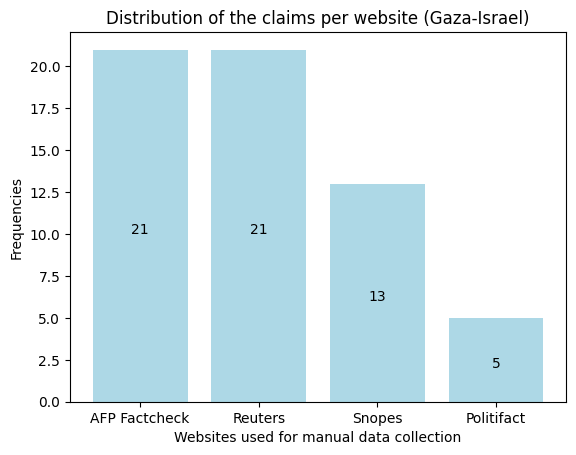

In [28]:
# Visualizing data distribution with plots

# Function to add centered value labels
def add_labels(x, y):
    for i in range(len(x)):
        plt.text(i, y[i] // 2, y[i], ha='center')  # Aligning text at center

# Plot bar chart for sector
plt.bar(counts_website.index, counts_website.values, color = "lightblue")

add_labels(counts_website.index, counts_website.values)

# Add titles and labels 
plt.title("Distribution of the claims per website (Gaza-Israel)")
plt.xlabel("Websites used for manual data collection")
#plt.xticks(rotation=90)
plt.ylabel("Frequencies")
plt.show()

In [26]:
# Distribution of labels across all websites and for each website


# For overall label distribution
label_counts = df['Label_Website'].value_counts()
print("Overall label distribution:")
print(label_counts)

# For label distribution per website
website_label_counts = df.groupby('Website')['Label_Website'].value_counts()
print("\nLabel distribution per website:")
print(website_label_counts)


Overall label distribution:
Label_Website
FALSE                    36
MISCAPTIONED              7
True                      4
MISLEADING                3
UNPROVEN                  2
Correct Attribution       2
NO EVIDENCE               1
ALTERED                   1
SYNTHETIC MEDIA           1
Incorrect Attribution     1
FAKE                      1
Originated as Satire      1
Name: count, dtype: int64

Label distribution per website:
Website        Label_Website        
AFP Factcheck  FALSE                    19
               MISLEADING                1
               UNPROVEN                  1
Politifact     FALSE                     5
Reuters        FALSE                     9
               MISCAPTIONED              7
               MISLEADING                2
               ALTERED                   1
               NO EVIDENCE               1
               SYNTHETIC MEDIA           1
Snopes         True                      4
               FALSE                     3
          

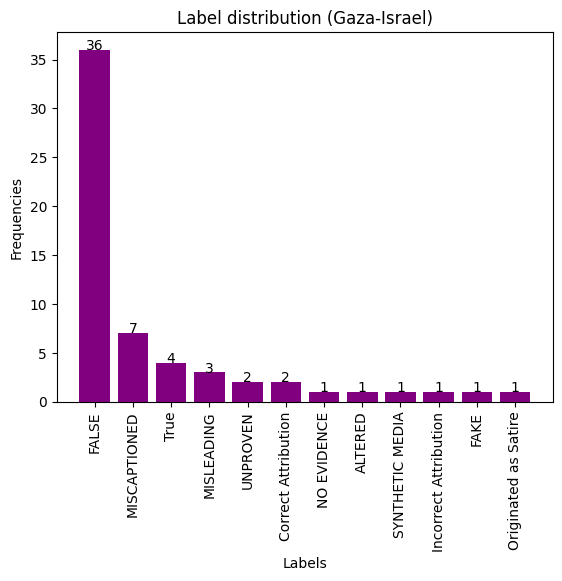

In [34]:
# Plot bar chart
plt.bar(label_counts.index, label_counts.values, color = "purple")

# Function to add centered value labels
def add_labels(x, y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha='center')  # Aligning text at center

# Add value labels
add_labels(label_counts.index, label_counts.values )

# Add titles and labels 
plt.title("Label distribution (Gaza-Israel)")
plt.xlabel("Labels")
plt.xticks(rotation=90)
plt.ylabel("Frequencies")
plt.show()

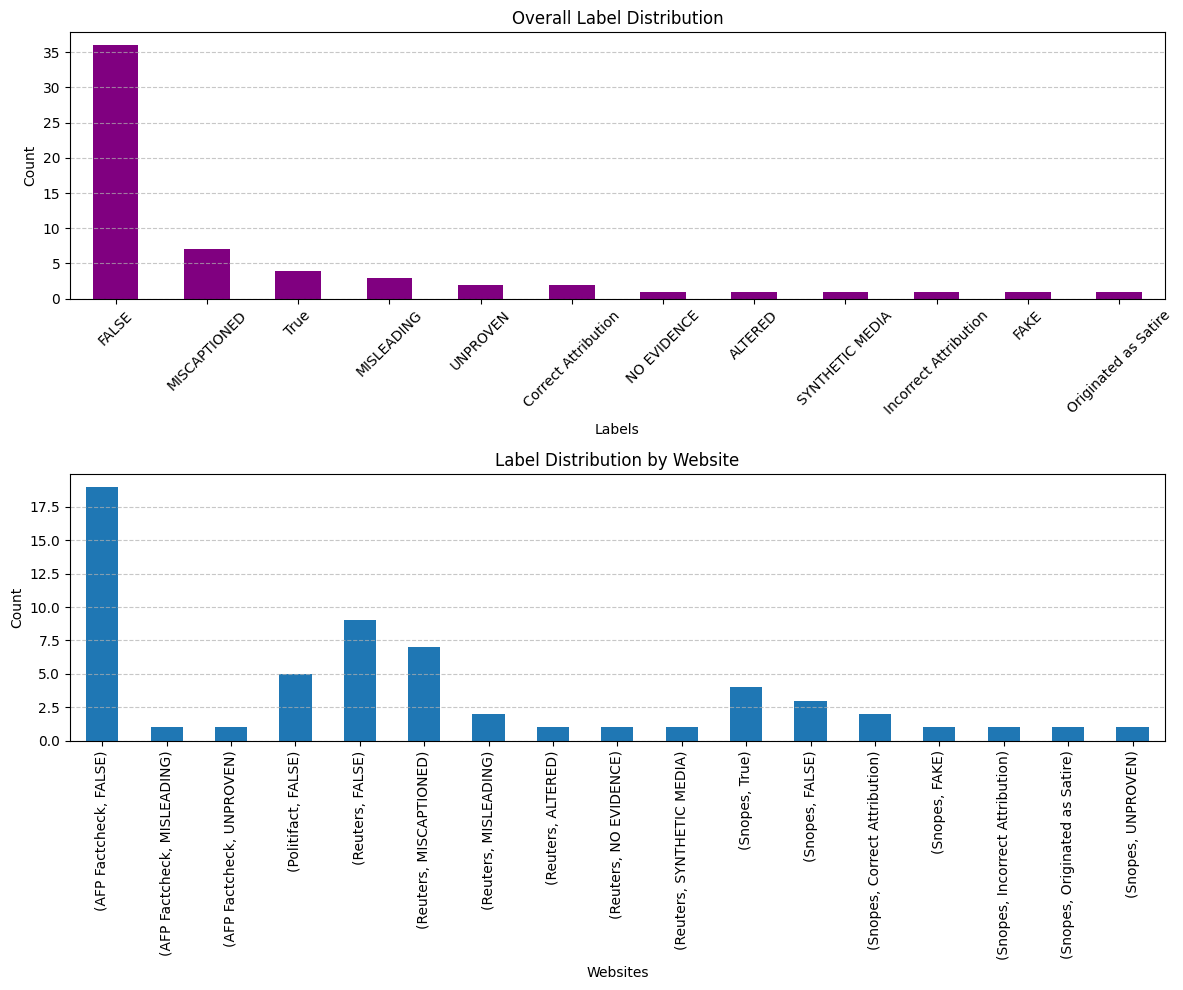

In [16]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot 1: Overall label distribution
label_counts.plot(kind='bar', ax=ax1, color='purple')
ax1.set_title('Overall Label Distribution')
ax1.set_xlabel('Labels')
ax1.set_ylabel('Count')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Plot 2: Label distribution per website


# Plot grouped bar chart
website_label_counts.plot(kind='bar', ax=ax2)
ax2.set_title('Label Distribution by Website')
ax2.set_xlabel('Websites')
ax2.set_ylabel('Count')
ax2.tick_params(axis='x', rotation=90)
ax2.grid(axis='y', linestyle='--', alpha=0.7)
#ax2.legend(title='Labels', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout and spacing
plt.tight_layout()
plt.show()


In [24]:
# Data Distribution of text-only claims vs. text claims with images (normal images, AI images, altered images)

print(df["Text_Only_Claim?"].value_counts())

print(df["Normal_Image?"].value_counts())


# Data Distribution of AI-images and altered images -> how many AI images and altered images are in the manual dataset?

print(df["AI_Generated_Image?"].value_counts())

df["Altered_Image?"].value_counts()


Text_Only_Claim?
No     32
Yes    28
Name: count, dtype: int64
Normal_Image?
No     37
Yes    23
Name: count, dtype: int64
AI_Generated_Image?
No     54
Yes     6
Name: count, dtype: int64


Altered_Image?
No     57
Yes     3
Name: count, dtype: int64

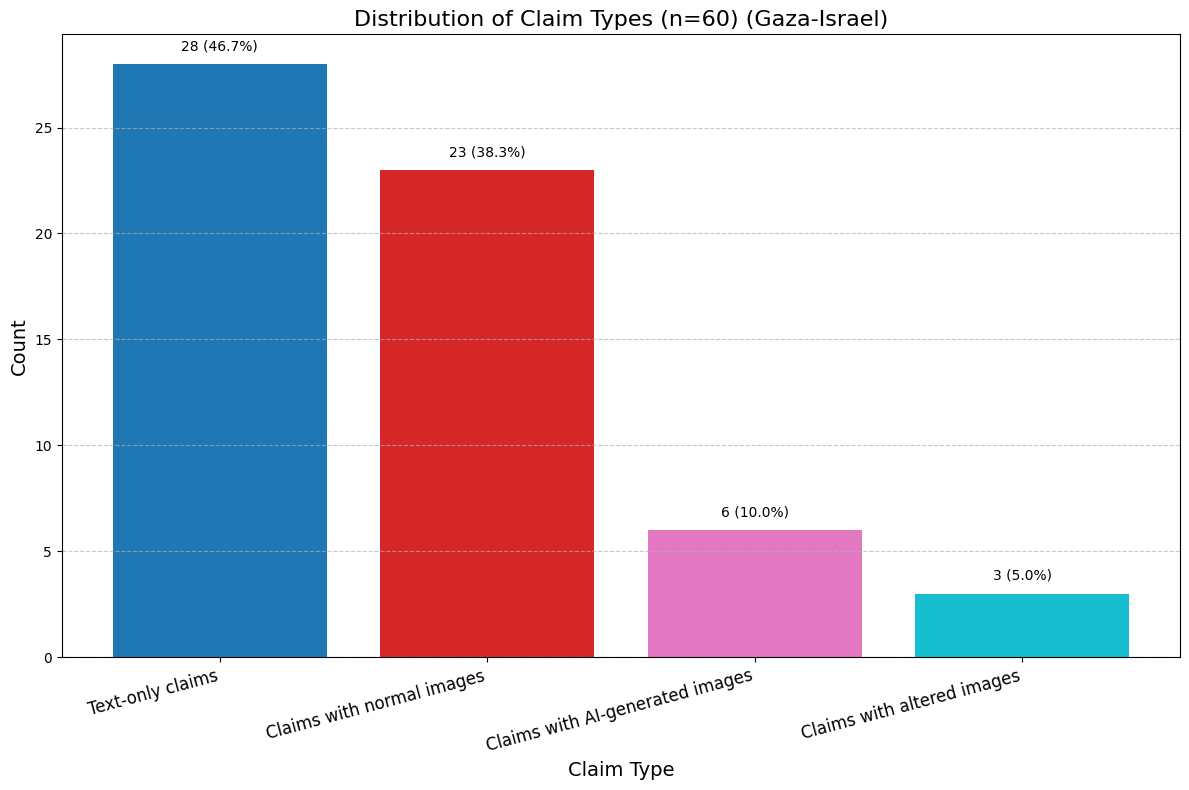

In [30]:
# Create a dictionary with the counts
data = {
    'Text-only claims': 28,
    'Claims with normal images': 23,
    'Claims with AI-generated images': 6,
    'Claims with altered images': 3
}

# Calculate total sample size
total = 60

# Sort the dictionary by values in descending order
sorted_data = dict(sorted(data.items(), key=lambda item: item[1], reverse=True))

# Create a figure
plt.figure(figsize=(12, 8))

# Create bar plot
categories = list(sorted_data.keys())
counts = list(sorted_data.values())

# Use a colormap for different colors
colors = plt.cm.tab10(np.linspace(0, 1, len(categories)))
bars = plt.bar(categories, counts, color=colors)

# Add value labels on top of each bar with percentages
for bar in bars:
    height = bar.get_height()
    percentage = (height / total) * 100
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{height} ({percentage:.1f}%)', ha='center', va='bottom')

# Add title and labels
plt.title('Distribution of Claim Types (n=60) (Gaza-Israel)', fontsize=16)
plt.xlabel('Claim Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=15, ha='right', fontsize=12)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


#### 2) Ukraine-Russia Dataset

In [36]:
import os
os.getcwd()

'/Users/fabilochner/Documents/Kopenhagen/MSc Social Data Science/Courses/4th semester/Master Thesis/Practical Implementation/Own_datasets'

In [37]:
df_2 = pd.read_csv("ukraine_russia/Manual_data_collection/Ukraine_Russia_Dataset_Manual_Collection_010724-100425.csv")
print(len(df_2)) #45 claims in total
df_2.head()

45


,Website,Article_URL,Headline,Month/Year,Query/Keyword/AFP Category,Label_Website,True_Image_URL,False_Caption/Original_Claim,True_Caption/Context,Text_Only_Claim?,Normal_Image?,AI_Generated_Image?,Altered_Image?,Comment,False_Image_URL,Possible_Query_Google Image Search
0,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.372Y6CV,Fake newspaper cover on Ukrainian soldiers in ...,03/25,"""War in Ukraine""",ALTERED,https://scontent-fra5-1.xx.fbcdn.net/v/t39.308...,"""The Kursk expedition was a disaster and a com...",But the supposed Hull Daily Mail headline blas...,No,No,No,Yes,NaN,NaN,NaN
1,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.36YR9KZ,"No, Zelensky hasn't bought Eagle's Nest, it is...",02/25,"""War in Ukraine""",FALSE,NaN,"According to the latest claims, Zelensky alleg...",Bavaria denies the sale\nThe Eagle's Nest is i...,Yes,No,No,No,NaN,NaN,NaN
2,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.36YC3DG,Claims that Ukraine banned Truth Social are false,02/25,"""War in Ukraine""",FALSE,NaN,"""BREAKING: Zelensky blocks access to President...","A spokesperson for https://tmtgcorp.com/, whic...",Yes,No,No,No,NaN,NaN,NaN
3,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.36P98ZW,Fake 'apocalypse' cover of The Economist circu...,12/24,"""War in Ukraine""",FALSE,https://scontent-lga3-2.xx.fbcdn.net/v/t39.308...,"""APOCALYPSE: Allowing missile strikes deep int...","However, https://www.economist.com/ does list ...",No,No,No,Yes,NaN,NaN,NaN
4,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.36MM6QY,Old photo misrepresented as coffins of 'Britis...,11/24,"""War in Ukraine""",FALSE,https://images.static.press.net/v2/image/previ...,"""Recently, 18 members of the British special f...",A reverse image search and keyword searches on...,No,Yes,No,No,MISCAPTIONED Label?,NaN,NaN


In [38]:
## Data distribution of websites

counts_website = df_2["Website"].value_counts()
counts_website

Website
Snopes           14
AFP Factcheck    12
Reuters          11
Politifact        8
Name: count, dtype: int64

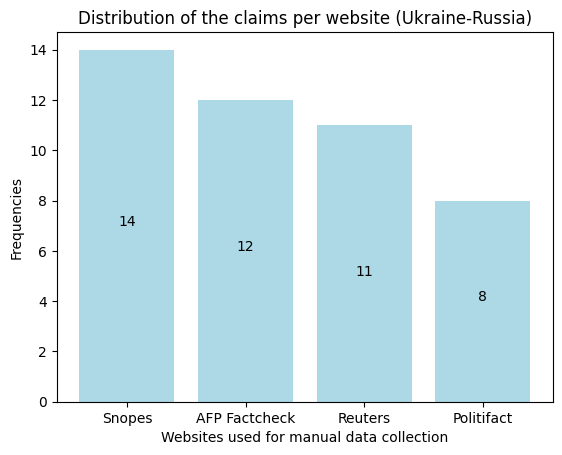

In [39]:
# Visualizing data distribution with plots

# Function to add centered value labels
def add_labels(x, y):
    for i in range(len(x)):
        plt.text(i, y[i] // 2, y[i], ha='center')  # Aligning text at center



# Plot bar chart
plt.bar(counts_website.index, counts_website.values, color = "lightblue")

# Add value labels
add_labels(counts_website.index, counts_website.values )

# Add titles and labels 
plt.title("Distribution of the claims per website (Ukraine-Russia)")
plt.xlabel("Websites used for manual data collection")
#plt.xticks(rotation=90)
plt.ylabel("Frequencies")
plt.show()

In [40]:
# Distribution of labels across all websites and for each website


# For overall label distribution
label_counts = df_2['Label_Website'].value_counts()
print("Overall label distribution:")
print(label_counts)

# For label distribution per website
website_label_counts = df_2.groupby('Website')['Label_Website'].value_counts()
print("\nLabel distribution per website:")
print(website_label_counts)


Overall label distribution:
Label_Website
FALSE                  29
ALTERED                 3
True                    3
MISLEADING              2
MISCAPTIONED            2
MIXTURE                 2
Correct Attribution     2
MISSING CONTEXT         1
NO EVIDENCE             1
Name: count, dtype: int64

Label distribution per website:
Website        Label_Website      
AFP Factcheck  FALSE                  11
               ALTERED                 1
Politifact     FALSE                   8
Reuters        FALSE                   4
               ALTERED                 2
               MISLEADING              2
               MISCAPTIONED            1
               MISSING CONTEXT         1
               NO EVIDENCE             1
Snopes         FALSE                   6
               True                    3
               Correct Attribution     2
               MIXTURE                 2
               MISCAPTIONED            1
Name: count, dtype: int64


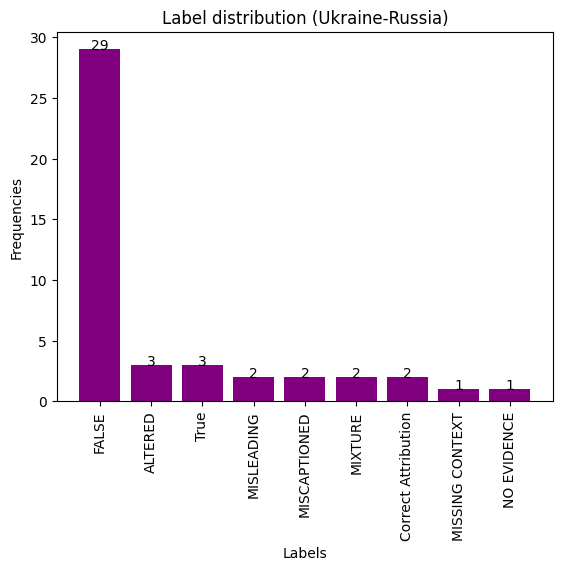

In [41]:
# Plot bar chart
plt.bar(label_counts.index, label_counts.values, color = "purple")

# Function to add centered value labels
def add_labels(x, y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha='center')  # Aligning text at center

# Add value labels
add_labels(label_counts.index, label_counts.values )

# Add titles and labels 
plt.title("Label distribution (Ukraine-Russia)")
plt.xlabel("Labels")
plt.xticks(rotation=90)
plt.ylabel("Frequencies")
plt.show()

In [19]:
# Data Distribution of text-only claims vs. text claims with images (normal images, AI images, altered images)

print(df_2["Text_Only_Claim?"].value_counts())

print(df_2["Normal_Image?"].value_counts())


# Data Distribution of AI-images and altered images -> how many AI images and altered images are in the manual dataset?

print(df_2["AI_Generated_Image?"].value_counts())

df_2["Altered_Image?"].value_counts()


Text_Only_Claim?
Yes    33
No     12
Name: count, dtype: int64
Normal_Image?
No     37
Yes     8
Name: count, dtype: int64
AI_Generated_Image?
No    45
Name: count, dtype: int64


Altered_Image?
No     41
Yes     4
Name: count, dtype: int64

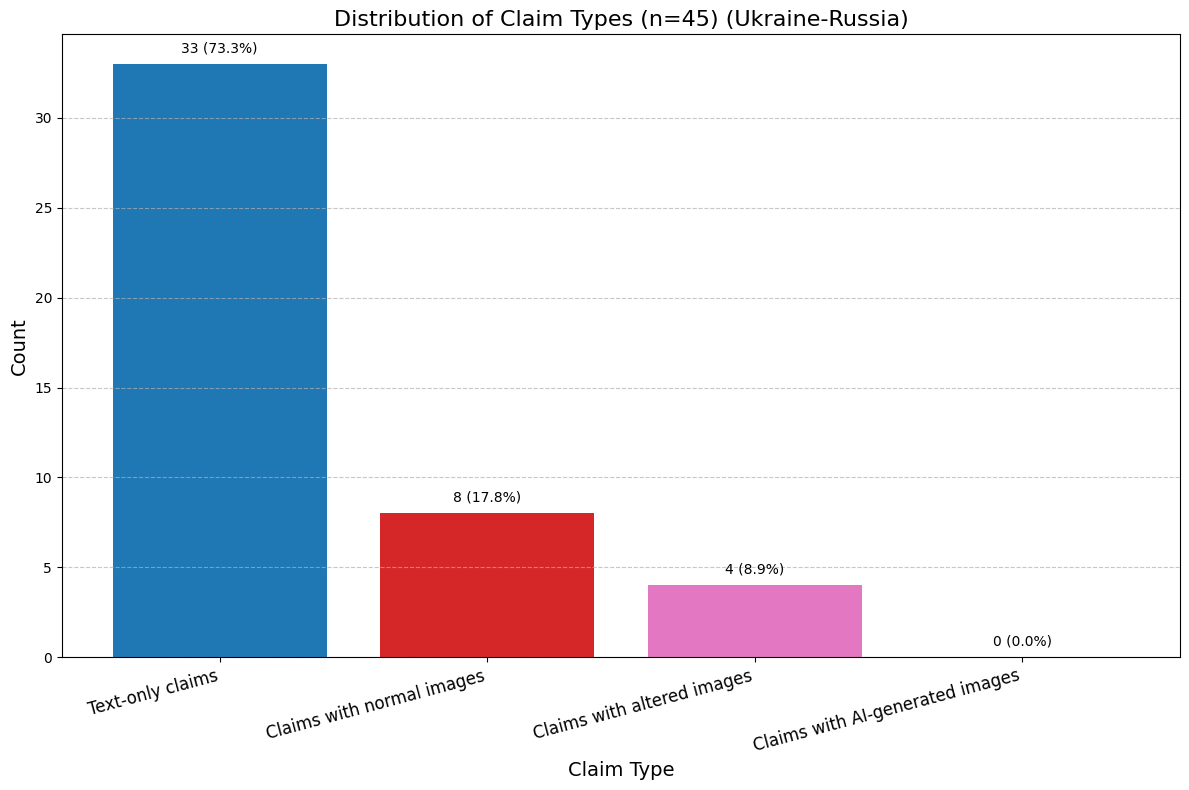

In [33]:
# Create a dictionary with the counts
data = {
    'Text-only claims': 33,
    'Claims with normal images': 8,
    'Claims with AI-generated images': 0,
    'Claims with altered images': 4
}

# Calculate total sample size
total = 45

# Sort the dictionary by values in descending order
sorted_data = dict(sorted(data.items(), key=lambda item: item[1], reverse=True))

# Create a figure
plt.figure(figsize=(12, 8))

# Create bar plot
categories = list(sorted_data.keys())
counts = list(sorted_data.values())

# Use a colormap for different colors
colors = plt.cm.tab10(np.linspace(0, 1, len(categories)))
bars = plt.bar(categories, counts, color=colors)

# Add value labels on top of each bar with percentages
for bar in bars:
    height = bar.get_height()
    percentage = (height / total) * 100
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{height} ({percentage:.1f}%)', ha='center', va='bottom')

# Add title and labels
plt.title('Distribution of Claim Types (n=45) (Ukraine-Russia)', fontsize=16)
plt.xlabel('Claim Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=15, ha='right', fontsize=12)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()